Before we start building on neural networks, let's take a look at simple perceptrons today. 

**Supervised vs unsupervised algorithms**

Machine learning algorithms are broadly segmented into two different types: Supervised vs unsupervised algorithm

Supervised algorithms learn from previously labeled data. For example, we may have data on houses and their sale price (the label). We may use this data to build a model that will predict sale price of other houses. So, in this case, our algorithm learns in a 'supervised' setting wherein the correct answer is already provided in the training phase. 

Unsupervised algorithms work on unlabeled dataset. Their goal is not to predict an output on a new set of predictor values. However, their goal is find underlying pattern in the data. 


**Perceptrons**

Perceptron is a class of supervised binary classifiers taht was first used in 1950s and is a plain and vanilla version of neural networks. It tends to mimic neurons in our brain. 

Basic working of neuron consists of fire / activate a trigger if it's inputs match a certain criteria. As we will see, perceptron work on the same principle. Perceptron accepts any number of binary inputs (0s or 1s) and provides a single binary output (again 0 / 1). 

Ex: Let's say I want to decide whether or not I will go to the movies tonight. My decision may be based on three factors: Are my friends going to the movie, how's the weather outside and is GoT going to air tonight. 

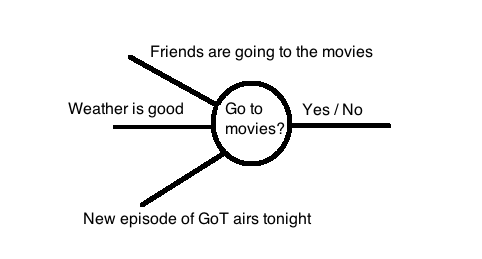

In [1]:
from IPython.display import Image
Image(filename='Perceptron-1.png')

Note that each of these links can be weighted based on my preference. Ex: If my friends are going to the movies (x1 = 1), weather is bad (x2 = 0) and no new episode of GoT is airing tonight (x3 = 0), I would go to the movies. However, if new episode of GoT airs tonight (x3 = 1), I am definitely not going to the movies irrespective if the weather is good or bad or whether my friends are going to the movie or not. 

So, I would weigh my third input (w3) higher than weights of first two inputs (w1 and w2). 

So, my decision can be modeled as:

output = sum(w.x) for all weights and inputs

And, 
- output = yes if sum(w.x) > threshold
- output = no  if sum(w.x) <= threshold
          
Furthermore, let's say that I already watched the leaked episode of GoT and hence, it doesn't matter whether or not a new episode airs tonight. So, based on that, my threshold value changes. This can be modeled using what we call 'bias'. Bias is a measurement of how easy it is for a perceptron to say 'yes' / 'no'

So, based on bias (b), our equation above changes as:

- output = yes if sum(w.x + b) > threshold
- output = no  if sum(w.x + b) <= threshold

Now that we have a fair idea of how the perceptron works, we will get to coding. 

### Perceptron implementation in Python

So, based on the discussion above, goal of perceptron is find the correct values of weights such that it can correctly predict the output. 

Following are the steps we will implement to help create our perceptron:

- Since we do not know the value of the weights, we will randomly assign them to any value
- We will then multiply each weight by it's respective input and take a sum of this product. This will give us the expected output
- Since perceptrons is a supervised learning algorithm, we already have actual output values. We will compute 'error' as difference between actual and expected output
- Since goal of perceptron is to find optimal weights such that the 'error' is minimized, we will update our weights at each step 

We will continue to do this for a given set of iterations (let's say 100 iterations). We will also set a value for 'learning_rate' parameter. 

Learning rate is a value between 0 and 1 and defines the rate at which our model learns about the data. If the learning_rate is too high, our program will change its weights so quickly that they are inaccurate. On the other hand, if learning_rate is too low, it will take forever to train the perceptron accurately. A good value for this parameter is about 0.01-0.05.

For our example, we will try to implement NAND gate using perceptron. The truth table for NAND gate is as shown below. 

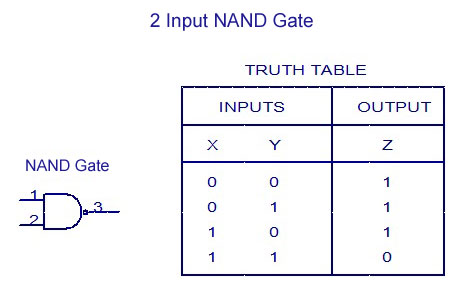

In [2]:
Image(filename='2-Input-NAND-Gate-Truth-Table.jpg')

In [3]:
from random import choice 
from numpy import array, dot, random
import pandas as pd

In [4]:
# Step 1: We will set up our training data with the actual output based on 
# the truth table above
nand_truth_tble = [(array([0,0,1]), 1), 
                   (array([0,1,1]), 1), 
                   (array([1,0,1]), 1), 
                   (array([1,1,1]), 0)]
nand_truth_tble

[(array([0, 0, 1]), 1),
 (array([0, 1, 1]), 1),
 (array([1, 0, 1]), 1),
 (array([1, 1, 1]), 0)]

In [5]:
#Step 2: Define how our output will be computed
#Based on the discussion above, our output = 1 if sum(weights*x + bias) > 0
# else, output = 0. This is the definition of a unit step function actually
output = lambda x: 0 if x < 0 else 1

In [6]:
#Step 3: Set up values for learning_rate, number of iterations (n) and an 
# empty list to capture the errors
error = []
n = 100
learning_rate = 0.05

In [7]:
#Step 4: Initialize random weights. Each of the weight is between -1 and 1
weights = [random.rand() * 2 - 1 for _ in range(3)]

In [8]:
#Step 5: Find the dot product of first row and the weights 
x, actual = nand_truth_tble[0]
w_dot_x = dot(weights, x)
print 'x', x
print 'actual', actual
print 'w_dot_x', w_dot_x

x [0 0 1]
actual 1
w_dot_x 0.234122543292


In [9]:
#Step 6: Calculate the expected output
expected = output(w_dot_x)
expected

1

In [10]:
#Step 6: Find the difference between actual and expected values
error = actual - expected
error

0

In [11]:
#Step 7: we need to update weights based on the error
weights += error * learning_rate * x

#### Putting all of this together

In the implementation above, we only looked at the very first row of the data. Now, we will put each of the step together to compute final outputs of NAND gate

In [12]:
nand_truth_tble = [(array([0,0,1]), 1), 
                   (array([0,1,1]), 1), 
                   (array([1,0,1]), 1), 
                   (array([1,1,1]), 0)]

output = lambda x: 0 if x < 0 else 1

error = []
n = 100
learning_rate = 0.05

weights = [random.rand() * 2 - 1 for _ in range(3)]

for i in range(n):
    x, actual = choice(nand_truth_tble)
    w_dot_x = dot(weights, x)
    expected = output(w_dot_x)
    error = actual - expected
    weights += error * learning_rate * x

for x, _ in nand_truth_tble: 
    result = dot(x, weights) 
    print("{}: {} -> {}".format(x[:2], result, output(result)))

[0 0]: 0.389646789844 -> 1
[0 1]: 0.0696254096033 -> 1
[1 0]: 0.155102933522 -> 1
[1 1]: -0.164918446719 -> 0


And that's it! You have now created your own perceptron!

In the next tutorial, we will start building neural network from scratch